In [36]:
file = open('iris.csv').read().split('\n')[1:101]
learning_rate = 0.8

In [37]:
klayer = []
for i in range(0,len(file)):
    file[i] = file[i].split(',')
    
    for j in range(0,len(file[i])):
        try:
            file[i][j] = float(file[i][j])
        except ValueError:
            pass
a=0
b=20
for j in range(0,5):
    klayer.append(file[a:b])
    a=a+20
    b=b+20
print(klayer[0])

[[5.1, 3.5, 1.4, 0.2, 'setosa'], [4.9, 3.0, 1.4, 0.2, 'setosa'], [4.7, 3.2, 1.3, 0.2, 'setosa'], [4.6, 3.1, 1.5, 0.2, 'setosa'], [5.0, 3.6, 1.4, 0.2, 'setosa'], [5.4, 3.9, 1.7, 0.4, 'setosa'], [4.6, 3.4, 1.4, 0.3, 'setosa'], [5.0, 3.4, 1.5, 0.2, 'setosa'], [4.4, 2.9, 1.4, 0.2, 'setosa'], [4.9, 3.1, 1.5, 0.1, 'setosa'], [5.4, 3.7, 1.5, 0.2, 'setosa'], [4.8, 3.4, 1.6, 0.2, 'setosa'], [4.8, 3.0, 1.4, 0.1, 'setosa'], [4.3, 3.0, 1.1, 0.1, 'setosa'], [5.8, 4.0, 1.2, 0.2, 'setosa'], [5.7, 4.4, 1.5, 0.4, 'setosa'], [5.4, 3.9, 1.3, 0.4, 'setosa'], [5.1, 3.5, 1.4, 0.3, 'setosa'], [5.7, 3.8, 1.7, 0.3, 'setosa'], [5.1, 3.8, 1.5, 0.3, 'setosa']]


In [38]:
import random

theta=[random.random(), random.random(), random.random(), random.random()]
bias=random.random()
print(theta)
print(bias)

[0.4088637806185672, 0.014771215638251234, 0.03842136692710185, 0.04010677576430366]
0.9066824438960461


In [39]:
category = {
    'setosa': 1,
    'versicolor': 0
}

In [40]:
import math

avgerrortrainperepoc = []

avgerrorvalperepoc = []

avgtraintruepredperepoc = []

avgvaltruepredperepoc = []



for i in range(0,300):
    avgerrortrainperlayer = []
    avgerrorvalperlayer = []
    avgtraintruepredperlayer = []
    avgvaltruepredperlayer = []
    for m in range(0,5):
        toterror = 0
        trucount = 0
        valtoterror = 0
        valtrucount = 0
        validate=klayer[m]
        for n in range(0,5):
            if (klayer[n] != validate):
                for row in klayer[n]:
                    result = 0
                    for k in range(0,4):
                        result = result+(row[k]*theta[k])
                    result = result + bias
                    activation = 1/(1+math.exp(0-result))
                    if(activation > 0.5):
                        pred = 1
                    else:
                        pred = 0
                    if(category[row[4]] == pred):
                        trucount += 1
                    error=(activation-category[row[4]])**2
                    toterror+=error
                    
                    dtheta1 = 2*(activation - category[row[4]])*(1-category[row[4]])*activation*row[0]
                    dtheta2 = 2*(activation - category[row[4]])*(1-category[row[4]])*activation*row[1]
                    dtheta3 = 2*(activation - category[row[4]])*(1-category[row[4]])*activation*row[2]
                    dtheta4 = 2*(activation - category[row[4]])*(1-category[row[4]])*activation*row[3]
                    dbias = 2*(activation - category[row[4]])*(1-category[row[4]])*activation
                    
                    theta = [
                        (theta[0] - learning_rate * dtheta1),
                        (theta[1] - learning_rate * dtheta2),
                        (theta[2] - learning_rate * dtheta3),
                        (theta[3] - learning_rate * dtheta4),
                    ]
                    bias = bias - learning_rate * dbias
        avgerrortrainperlayer.append(toterror/80)
        avgtraintruepredperlayer.append(trucount/80)
        for row in validate:
            resultval = 0
            for k in range(0,4):
                resultval = resultval+(row[k]*theta[k])
            resultval = resultval + bias
            activationval = 1/(1+math.exp(0-resultval))
            predval = round(activationval)
            if(category[row[4]] == predval):
                valtrucount += 1
            valerror=(activationval-category[row[4]])**2
            valtoterror += error
        avgvaltruepredperlayer.append(valtrucount/20)
        avgerrorvalperlayer.append(valerror/20)
    avgerrortrainperepoc.append(sum(avgerrortrainperlayer)/5)
    avgtraintruepredperepoc.append(sum(avgtraintruepredperlayer)/5)
    avgerrorvalperepoc.append(sum(avgerrorvalperlayer)/5)
    avgvaltruepredperepoc.append(sum(avgvaltruepredperlayer)/5)

print(avgerrortrainperepoc)
print('\n\n\n')
print(avgtraintruepredperepoc)
print('\n\n\n')
print(avgerrorvalperepoc)
print('\n\n\n')
print(avgvaltruepredperepoc)



[0.42756949775084907, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

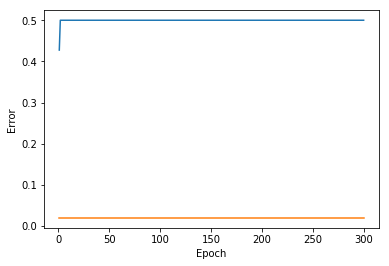

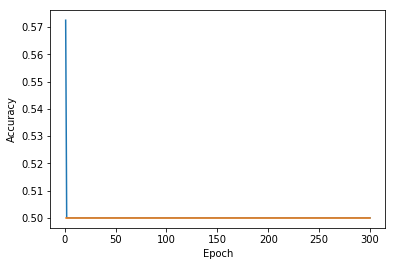

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,301), avgerrortrainperepoc)
plt.plot(range(1,301), avgerrorvalperepoc)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

plt.plot(range(1,301), avgtraintruepredperepoc)
plt.plot(range(1,301), avgvaltruepredperepoc)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()